In [11]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
x_train = df.iloc[:,1:-1]
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y_train = df.iloc[:,-1]
y_train

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [14]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
modeloSvc = SVC()
modeloNeigh = KNeighborsClassifier(n_neighbors=3)
modeloSvc.fit(x_train,y_train)

SVC()

In [15]:
#Integracion de la herramienta de precision (Accuracy)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modeloNeigh, x_train, y_train.values.ravel(), cv=5, scoring='accuracy')
print("Accuracy en cada interacion: ", scores)

Accuracy en cada interacion:  [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


In [16]:
#Seccion donde realize una prediccion con datos que yo mismo agrege
x_test = pd.DataFrame({'SepalLengthCm':[8,5.7,4.5,5,6.2], 'SepalWidthCm':[4,3.1,3,2.4,3.5], 'PetalLengthCm':[7,3,2.7,3.2,6.4], 'PetalWidthCm':[2.5,1,0.2,0.3,0.8]})
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,8.0,4.0,7.0,2.5
1,5.7,3.1,3.0,1.0
2,4.5,3.0,2.7,0.2
3,5.0,2.4,3.2,0.3
4,6.2,3.5,6.4,0.8


In [17]:
predicted = modeloSvc.predict(x_test)
predicted

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
x_test = pd.DataFrame(x_test)
x_test['prediccion'] = predicted
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,prediccion
0,8.0,4.0,7.0,2.5,Iris-virginica
1,5.7,3.1,3.0,1.0,Iris-versicolor
2,4.5,3.0,2.7,0.2,Iris-setosa
3,5.0,2.4,3.2,0.3,Iris-versicolor
4,6.2,3.5,6.4,0.8,Iris-virginica


In [19]:
#Tarea de la graficacion
colors = {'Iris-setosa': 'RoyalBlue', 'Iris-versicolor': 'DarkSeaGreen', 'Iris-virginica': 'Crimson'}
color_Species = df.Species.map(colors)

coloresPredic = {'Iris-setosa': '#FF8700', 'Iris-versicolor': '#FF8700', 'Iris-virginica': '#FF8700'}
colores_Predic = x_test.prediccion.map(coloresPredic)

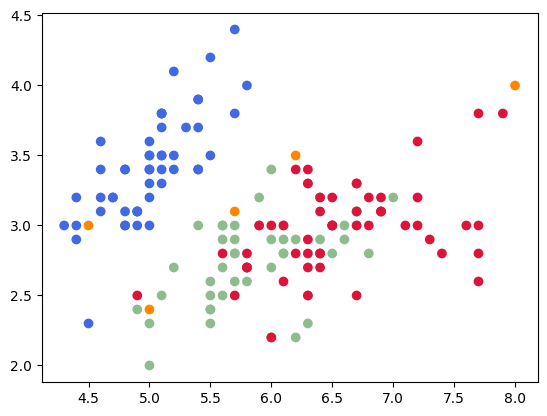

In [20]:
fig, ax = plt.subplots()
ax.scatter(df.SepalLengthCm, df.SepalWidthCm, color = color_Species)

ax.scatter(x_test.SepalLengthCm, x_test.SepalWidthCm, color = colores_Predic)
plt.show()